# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
# your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

# Task 2:  Data cleaning

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(406829, 8)

In [10]:
df.duplicated().sum()

5225

In [11]:
df = df.drop_duplicates()
df.shape

(401604, 8)

In [8]:
# Specify the column names to be removed
columns_to_drop = ["InvoiceNo", "StockCode"]
cleaned_df = df.drop(columns=columns_to_drop)

# Task 3: Explore the basic statistics

In [10]:
cleaned_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
cleaned_df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [12]:
cleaned_df['Country'].mode() 

0    United Kingdom
dtype: object

In [14]:
median = cleaned_df.median()
median

Quantity          3.00
UnitPrice         2.08
CustomerID    15152.00
Totalsell         9.75
dtype: float64

# Task 4: Perform data visualization

In [13]:
cleaned_df['Totalsell'] = cleaned_df['Quantity'] * cleaned_df['UnitPrice']
cleaned_df


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [16]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
cleaned_df['MonthYear'] = cleaned_df['InvoiceDate'].dt.to_period('M')

# Print the DataFrame with the 'MonthYear' column
cleaned_df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsell,MonthYear
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


Text(0, 0.5, 'TotalSell')

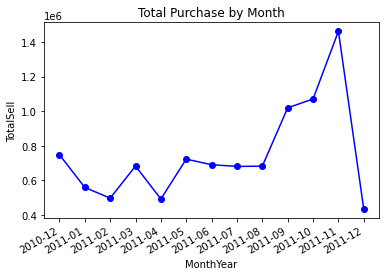

In [17]:
# Group the data by 'MonthYear' and calculate the total purchase for each month
monthly_data = cleaned_df.groupby('MonthYear')['Totalsell'].sum().reset_index()

# Convert the 'MonthYear' column to string format for plotly
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(6, 4)) # Width: 10 inches, Height: 5 inches

# Automatic formatting to the x-axis labels when dealing with dates. 
fig.autofmt_xdate()  

# Display the plot
plt.plot(monthly_data['MonthYear'], monthly_data['Totalsell'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Total Purchase by Month')
plt.xlabel('MonthYear')
plt.ylabel('TotalSell')

,Quantity,UnitPrice,CustomerID,Totalsell
Quantity,1.000000,-0.001235,-0.003600,0.886681
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029
CustomerID,-0.003600,-0.004560,1.000000,-0.002274
Totalsell,0.886681,-0.162029,-0.002274,1.000000


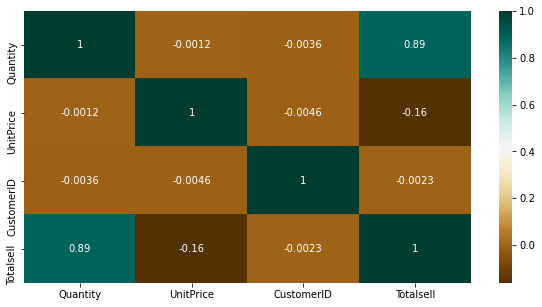

In [18]:
plt.figure(figsize=(10,5))
corr = cleaned_df.corr()
sns.heatmap(corr,cmap="BrBG",annot=True)
corr

In [19]:
# Extract the month from the 'InvoiceDate'
cleaned_df['Month'] = cleaned_df['InvoiceDate'].dt.month

# Extract the day of the week from the 'InvoiceDate'
cleaned_df['DayOfWeek'] = cleaned_df['InvoiceDate'].dt.day_name()

# Calculate total sales for each month
monthly_sales = cleaned_df.groupby('Month')['Totalsell'].sum()

# Calculate total sales for each day of the week
daily_sales = cleaned_df.groupby('DayOfWeek')['Totalsell'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print('\033[1m' + "Busiest Month (in terms of sells):" +'\033[0m', busiest_month)
print('\033[1m' + "Busiest Day of the Week (in terms of sales):" +'\033[0m', busiest_day)

Busiest Month (in terms of sells): 11
Busiest Day of the Week (in terms of sales): Thursday


Text(0.5, 1.0, 'Sales Trend by Day of Week')

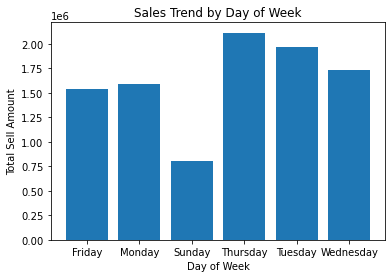

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Week')
plt.ylabel('Total Sell Amount')
plt.title('Sales Trend by Day of Week')

In [22]:
# Calculate the total purchase amount for each customer
customer_total_purchase = cleaned_df.groupby('CustomerID')['Totalsell'].sum()

# Sort the customers based on the total purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Convert the Series to a DataFrame
most_valuable_customers_df = pd.DataFrame(most_valuable_customers, columns=['Totalsell']).reset_index()

# Count the total number of customers
total_customers = cleaned_df['CustomerID'].nunique()

# Print the total number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(most_valuable_customers_df['CustomerID'][:10]))

Among 4372 customers, the top 10 customers are: [14646.0, 18102.0, 17450.0, 14911.0, 12415.0, 14156.0, 17511.0, 16684.0, 13694.0, 15311.0]


In [25]:
# Find country with most sells in the list
countrywise_sell = cleaned_df.groupby('Country')['Totalsell'].sum()

# Sort countries based on the total sells in ascending order
top_selling_country = countrywise_sell.sort_values(ascending=False)

# Convert the Series to a DataFrame
top_selling_country_df = pd.DataFrame(top_selling_country, columns=['Totalsell']).reset_index()

# Count the total countries
total_countries = cleaned_df['Country'].nunique()

# Print the total countries and the top 10 countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_selling_country_df['Country'][:10]))

Among 38 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden']


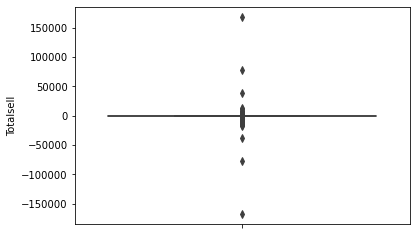

In [26]:
# Create a box plot
sns.boxplot(data=cleaned_df, y='Totalsell')

# Display the plot
plt.show()

In [27]:
from scipy import stats

# Calculate the Z-Score for the 'Quantity' column
z_scores = stats.zscore(cleaned_df['Totalsell'])

# Create a boolean mask to identify outliers (both positive and negative Z-scores)
threshold = 3
outlier_mask = abs(z_scores) > threshold

# Extract outliers from the DataFrame
outliers = cleaned_df[outlier_mask]

outliers.shape

(403, 10)

In [28]:
# Remove outliers from the main dataset
without_outliers_online_retail = cleaned_df[~outlier_mask]

# Statistical Summary of data without outliers
without_outliers_online_retail.describe()

,Quantity,UnitPrice,CustomerID,Totalsell,Month
count,541506.000000,541506.000000,406521.000000,541506.000000,541506.000000
mean,9.261846,3.785467,15286.981556,17.480464,7.552915
std,50.667328,15.200982,1713.274404,44.295123,3.509158
min,-9600.000000,0.000000,12347.000000,-1110.000000,1.000000
25%,1.000000,1.250000,13952.000000,3.400000,5.000000
50%,3.000000,2.080000,15152.000000,9.500000,8.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000
max,12540.000000,1136.300000,18287.000000,1153.200000,12.000000


In [30]:
cleaned_df.describe() # Statistical Summary of data with outliers

,Quantity,UnitPrice,CustomerID,Totalsell,Month
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,7.553128
std,218.081158,96.759853,1713.600303,378.810824,3.509055
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000
25%,1.000000,1.250000,13953.000000,3.400000,5.000000
50%,3.000000,2.080000,15152.000000,9.750000,8.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000


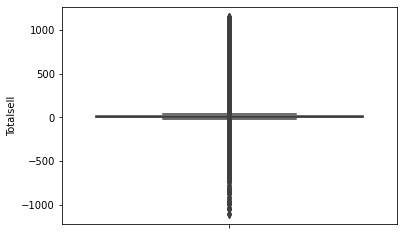

In [31]:
# Create a box plot of without_outliers_online_retail data
sns.boxplot(data=without_outliers_online_retail, y='Totalsell')

# Display the plot
plt.show()